In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet50V2
import cv2
from IPython.display import Image

In [20]:
(train_X_mnist, train_y_mnist), (test_X_mnist, test_y_mnist) = mnist.load_data()
train_X_mnist = train_X_mnist.reshape(60000,28,28,1)
test_X_mnist = test_X_mnist.reshape(10000,28,28,1)
(train_X_fashion_mnist, train_y_fashion_mnist), (test_X_fashion_mnist, test_y_fashion_mnist) = fashion_mnist.load_data()
train_X_fashion_mnist = train_X_fashion_mnist.reshape(60000,28,28,1)
test_X_fashion_mnist = test_X_fashion_mnist.reshape(10000,28,28,1)

In [21]:
train_y_mnist = to_categorical(train_y_mnist)
test_y_mnist = to_categorical(test_y_mnist)
train_y_fashion_mnist = to_categorical(train_y_fashion_mnist)
test_y_fashion_mnist = to_categorical(test_y_fashion_mnist)

In [22]:
print('train_X_mnist: ' + str(train_X_mnist.shape))
print('train_y_mnist: ' + str(train_y_mnist.shape))
print('test_X_mnist:  '  + str(test_X_mnist.shape))
print('test_y_mnist:  '  + str(test_y_mnist.shape))

print()
print()

print('train_X_fashion_mnist: ' + str(train_X_fashion_mnist.shape))
print('train_y_fashion_mnist: ' + str(train_y_fashion_mnist.shape))
print('test_X_fashion_mnist:  '  + str(test_X_fashion_mnist.shape))
print('test_y_fashion_mnist:  '  + str(test_y_fashion_mnist.shape))

train_X_mnist: (60000, 28, 28, 1)
train_y_mnist: (60000, 10)
test_X_mnist:  (10000, 28, 28, 1)
test_y_mnist:  (10000, 10)


train_X_fashion_mnist: (60000, 28, 28, 1)
train_y_fashion_mnist: (60000, 10)
test_X_fashion_mnist:  (10000, 28, 28, 1)
test_y_fashion_mnist:  (10000, 10)


# LeNet

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

2022-04-24 23:56:09.645359: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2015 - accuracy: 0.9383 - val_loss: 0.0939 - val_accuracy: 0.9693


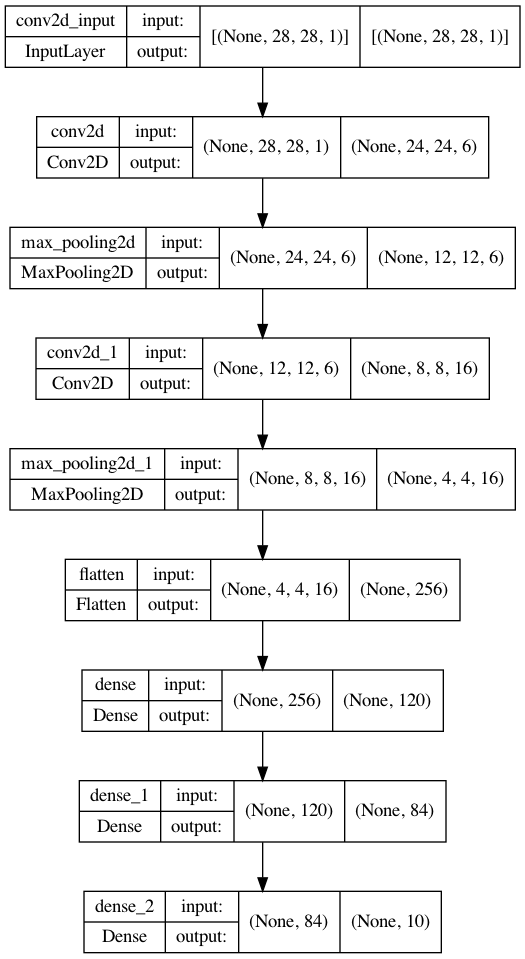

In [5]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_X_mnist, train_y_mnist, validation_data=(test_X_mnist, test_y_mnist), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='LeNet.png')

Image('LeNet.png')

# AlexNet

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 128)       

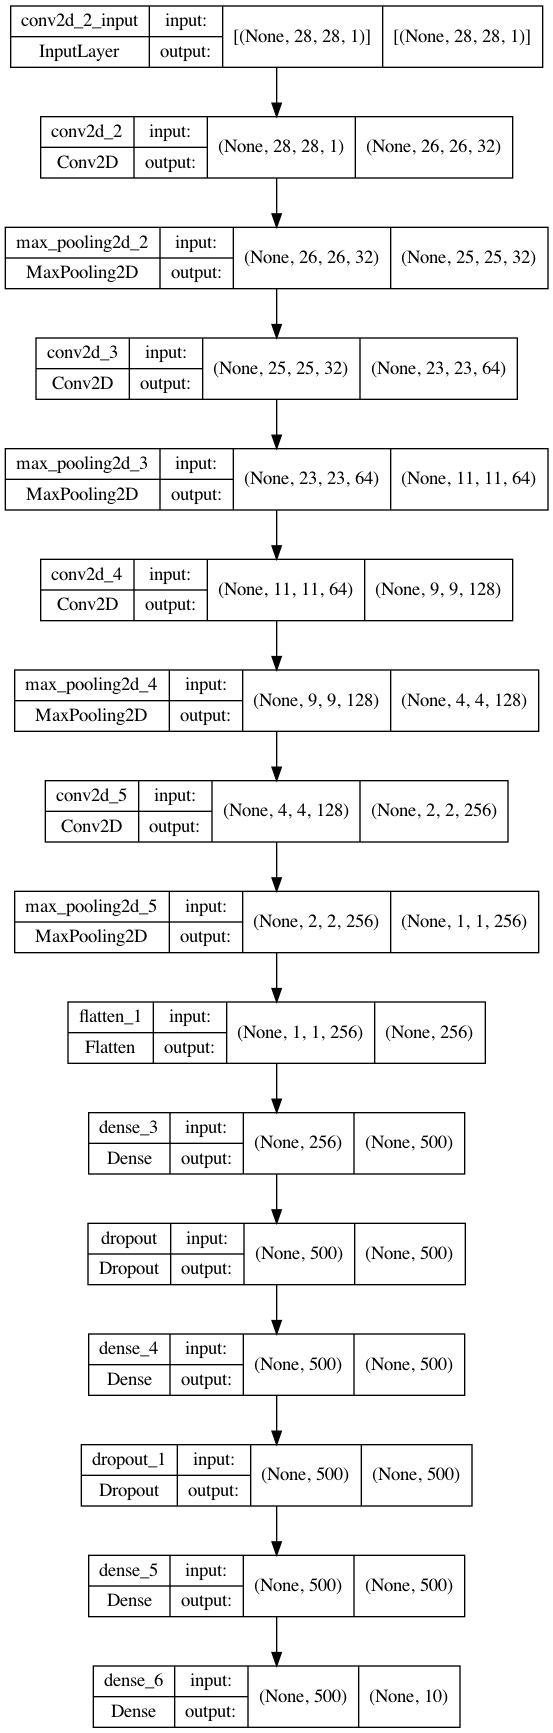

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_X_mnist, train_y_mnist, validation_data=(test_X_mnist, test_y_mnist), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='AlexNet.png')

Image('AlexNet.png')

# VGG16

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 4096)              2101248   
                                                                 
 dropout_2 (Dropout)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout_3 (Dropout)         (None, 4096)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

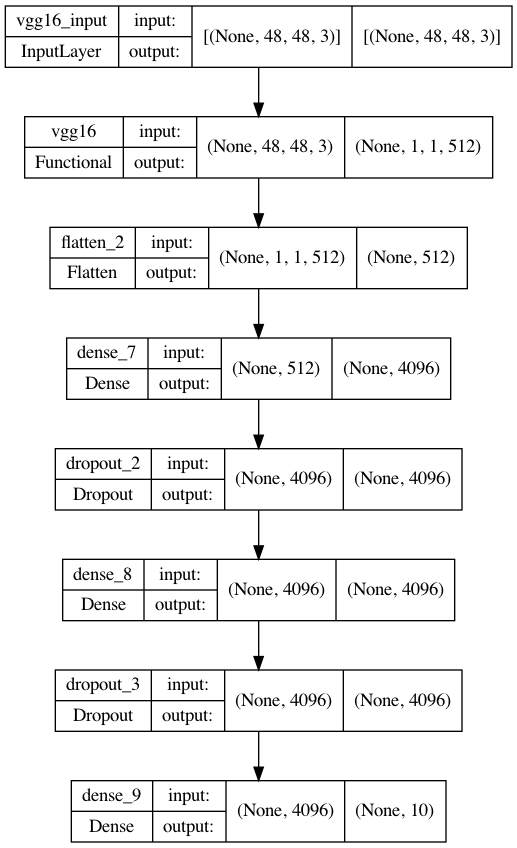

In [7]:
x_train = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])

x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,48,48,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,48,48,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))
conv_base.trainable = False
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='VGG16.png')

Image('VGG16.png')

# InceptionV3

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 4096)              8392704   
                                                                 
 dropout_4 (Dropout)         (None, 4096)              0         
                                                                 
 dense_11 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_5 (Dropout)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 10)               

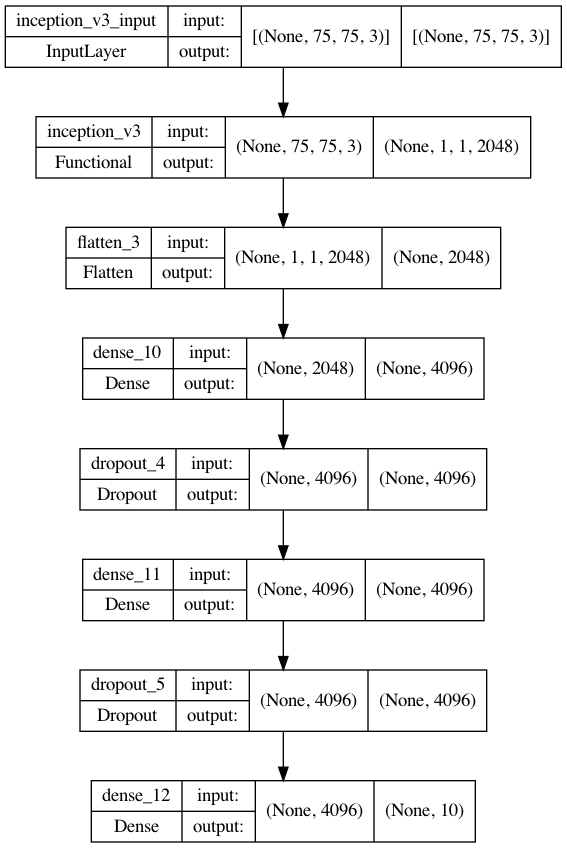

In [8]:
x_train = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])
x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,75,75,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,75,75,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='InceptionV3.png')

Image('InceptionV3.png')

# ResNet50V2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_13 (Dense)            (None, 4096)              75501568  
                                                                 
 dropout_6 (Dropout)         (None, 4096)              0         
                                                                 
 dense_14 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_7 (Dropout)         (None, 4096)              0         
                                                                 
 dense_15 (Dense)            (None, 10)               

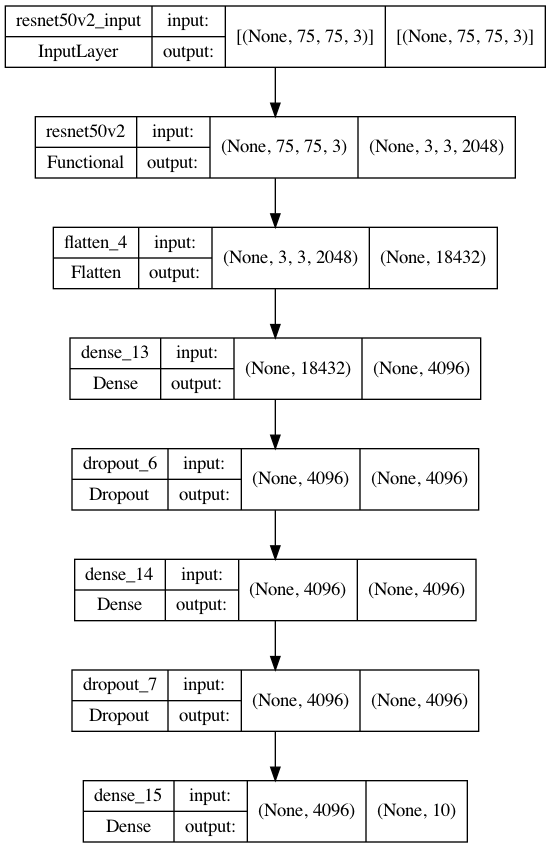

In [9]:
x_train = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in train_X_mnist]
x_test = [cv2.cvtColor(cv2.resize(i, (75,75)), cv2.COLOR_GRAY2BGR)for i in test_X_mnist]

x_train = np.concatenate([arr[np.newaxis]for arr in x_train])
x_test = np.concatenate([arr[np.newaxis]for arr in x_test])
x_train = x_train.astype("float32")/255
x_train = x_train.reshape((60000,75,75,3))
x_test = x_test.astype("float32")/255
x_test = x_test.reshape((10000,75,75,3))

x_val = x_train[:10000]
y_val = train_y_mnist[:10000]
x_train = x_train[10000:]
y_train = train_y_mnist[10000:]

conv_base = ResNet50V2(weights='imagenet', include_top=False, input_shape=(75,75,3))
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train, validation_data=(x_val,y_val), epochs=1)

plot_model(model, show_shapes=True, show_layer_names=True, to_file='ResNet50V2.png')

Image('ResNet50V2.png')

Best model is *LeNet*

In [10]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X_fashion_mnist, train_y_fashion_mnist, validation_data=(test_X_fashion_mnist, test_y_fashion_mnist), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5102 - accuracy: 0.8120 - val_loss: 0.4292 - val_accuracy: 0.8441
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3873 - accuracy: 0.8549 - val_loss: 0.3863 - val_accuracy: 0.8562
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3550 - accuracy: 0.8659 - val_loss: 0.3784 - val_accuracy: 0.8587
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3342 - accuracy: 0.8737 - val_loss: 0.3518 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3180 - accuracy: 0.8788 - val_loss: 0.3718 - val_accuracy: 0.8596
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3116 - accuracy: 0.8814 - val_loss: 0.3374 - val_accuracy: 0.8751
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3043 - accuracy: 0.8830 - val_loss: 0.3836 - val

In [23]:
predictions_soft = model.predict(test_X_fashion_mnist)
predictions = []
for i in range(len(predictions_soft)):
    predictions.append(np.argmax(predictions_soft[i]))

test_y = [np.where(r==1)[0][0] for r in test_y_fashion_mnist.copy()]

cm = confusion_matrix(test_y, predictions)

In [24]:
cm

array([[870,   2,  13,  15,   2,   0,  88,   0,  10,   0],
       [  2, 981,   1,   8,   3,   0,   5,   0,   0,   0],
       [ 14,   1, 687,   5, 186,   0, 107,   0,   0,   0],
       [ 23,  25,   8, 871,  36,   0,  33,   0,   3,   1],
       [  3,   1,  37,  21, 840,   0,  96,   0,   2,   0],
       [  0,   0,   0,   0,   0, 959,   0,  31,   1,   9],
       [169,   1,  65,  27,  98,   0, 628,   0,  11,   1],
       [  0,   0,   0,   0,   0,  11,   0, 975,   0,  14],
       [  3,   2,   9,   4,   7,   0,   6,   3, 965,   1],
       [  0,   0,   1,   0,   0,   9,   0,  55,   1, 934]])

In [26]:
def get_matrix(xs_test, ys_test, predictions_soft, classes_cnt):
    m = []
    sim_matrix = []
    for i in range(classes_cnt):
        m.append([0] * classes_cnt)
        sim_matrix.append([0] * classes_cnt)

    for i in range(len(xs_test)):
        actual = ys_test[i]
        for j in range(classes_cnt):
            if predictions_soft[i][j] > m[actual][j]:
                m[actual][j] = predictions_soft[i][j]
                sim_matrix[actual][j] = i
    return sim_matrix

In [28]:
sm = get_matrix(test_X_fashion_mnist, test_y, predictions_soft, classes_cnt=10)
sm

[[7200, 9880, 6710, 1111, 3132, 3466, 4067, 4924, 2599, 4924],
 [1482, 3137, 4678, 6117, 5597, 3052, 9485, 9647, 6331, 4187],
 [8914, 3880, 1467, 3489, 3032, 6942, 6286, 5459, 9276, 3187],
 [979, 803, 9325, 7645, 5576, 661, 7809, 8826, 2817, 3265],
 [4251, 8621, 8154, 6420, 8522, 404, 491, 7473, 7349, 3892],
 [3490, 5561, 6897, 5561, 6897, 7688, 6897, 8292, 6138, 6061],
 [2856, 7863, 3787, 8005, 7962, 7026, 1713, 4595, 3741, 7026],
 [7875, 8376, 7815, 3964, 2600, 7664, 7857, 3016, 7875, 2914],
 [9636, 2905, 3246, 3008, 5148, 9524, 4659, 6565, 8449, 3468],
 [5512, 623, 5512, 3070, 3999, 1718, 5512, 4850, 623, 8386]]

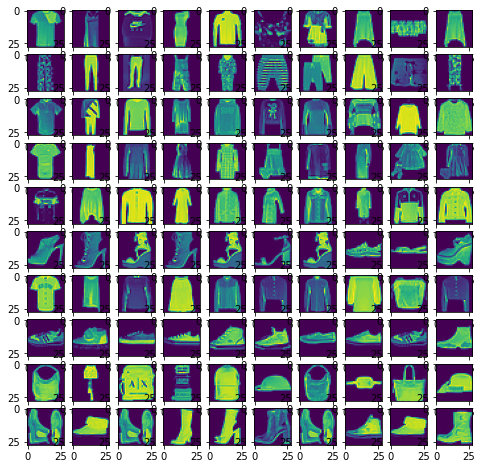

In [29]:
figure = plt.figure(figsize=(8, 8))

for ind in range(1, len(predictions_soft[0]) ** 2 + 1):
    i = (ind - 1) // len(predictions_soft[0])
    j = (ind - 1) % len(predictions_soft[0])

    index = sm[i][j]
    img = test_X_fashion_mnist[index]

    figure.add_subplot(len(predictions_soft[0]), len(predictions_soft[0]), ind)
    plt.imshow(img)